In [448]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [450]:
data = pd.read_csv("loyer_surface.csv",sep=',')

In [452]:
os.getcwd()

'C:\\Users\\TOSHIBA'

In [454]:
data.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [456]:
x = data['surface']
y = data['loyer']

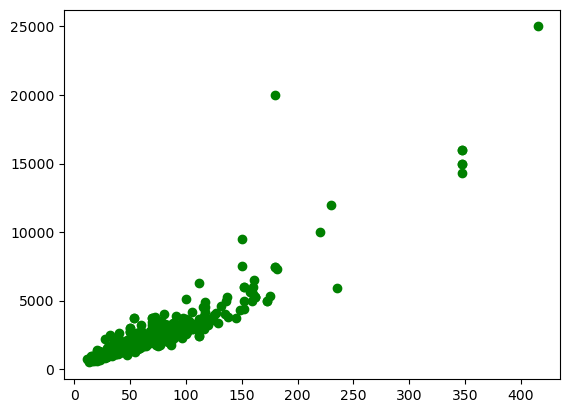

In [458]:
plt.scatter(x,y,color='green')
plt.show()

In [460]:
loyer_exclu_sup_10mil = data['loyer']<10000

In [462]:
new_data = data[loyer_exclu_sup_10mil]

In [464]:
type(new_data['loyer'])

pandas.core.series.Series

In [466]:
loyer_data = data['loyer']
surface_data = data['surface']

In [468]:
print(f"Min de loyer dans Data est {min(loyer_data)} et Max de loyer dans Data est : {max(loyer_data)}")

Min de loyer dans Data est 488 et Max de loyer dans Data est : 25000


In [470]:
loyer_new_data = new_data['loyer']
surface_new_data = new_data['surface']

In [472]:
print(f"Min de loyer dans Data est {min(loyer_new_data)} et Max de loyer dans Data est : {max(loyer_new_data)}")

Min de loyer dans Data est 488 et Max de loyer dans Data est : 9500


In [474]:
print(f"La taille de données avant l'exclusion de loyer sup à 10mil est de : {data.shape[0]} observations")

La taille de données avant l'exclusion de loyer sup à 10mil est de : 545 observations


In [476]:
print(f"La taille de données après l'exclusion de loyer sup à 10mil est de : {new_data.shape[0]} observations")

La taille de données après l'exclusion de loyer sup à 10mil est de : 536 observations


In [478]:
print(f"La différence donc est de  : {data.shape[0] - new_data.shape[0]} observations")

La différence donc est de  : 9 observations


In [480]:
new_x = new_data['surface']
new_y = new_data['loyer']

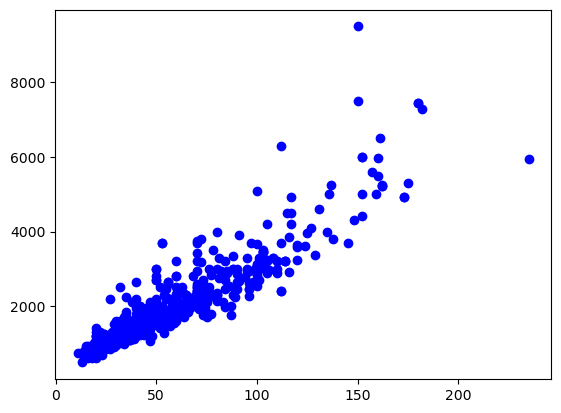

In [482]:
plt.scatter(new_x,new_y,color='blue')
plt.show()

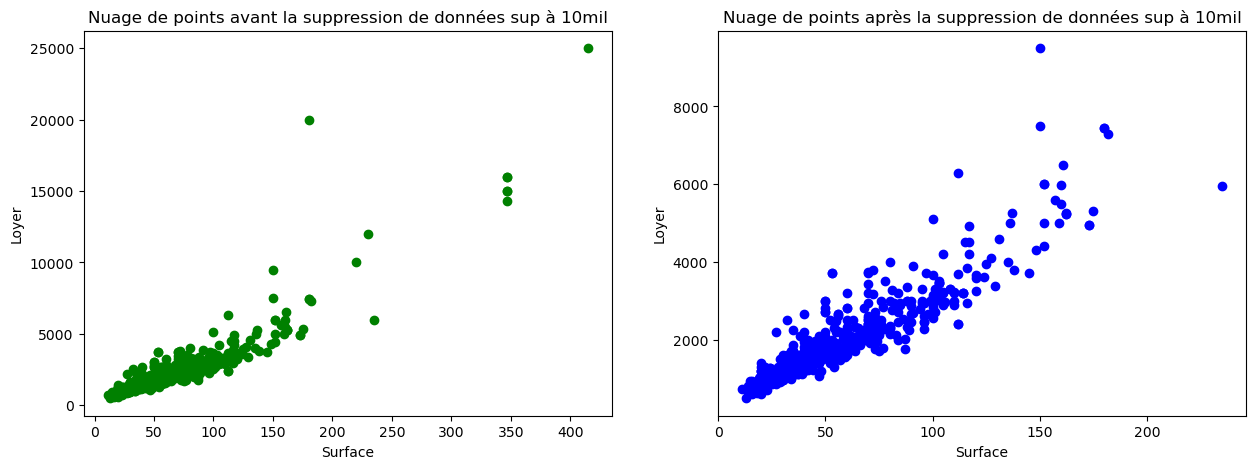

In [484]:
fig , axs = plt.subplots(1,2,figsize=(15,5))
axs[0].scatter(x,y,color='green')
axs[0].set_title('Nuage de points avant la suppression de données sup à 10mil')
axs[0].set_xlabel("Surface")
axs[0].set_ylabel("Loyer")
axs[1].scatter(new_x,new_y,color='blue')
axs[1].set_title('Nuage de points après la suppression de données sup à 10mil')
axs[1].set_xlabel("Surface")
axs[1].set_ylabel("Loyer")
plt.show()

In [486]:
X = new_data['surface']
y = new_data['loyer']

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [490]:
print(f"La taille de X est : {X.shape} et \n y est : {y.shape} ")

La taille de X est : (536,) et 
 y est : (536,) 


In [492]:
print(f"La taille de X_train est : {X_train.shape} et \n y_train est : {y_train.shape} ")

La taille de X_train est : (428,) et 
 y_train est : (428,) 


In [494]:
print(f"La taille de X_test est : {X_test.shape} et \n y_test est : {y_test.shape} ")

La taille de X_test est : (108,) et 
 y_test est : (108,) 


In [496]:
learn_model = LinearRegression()

In [498]:
X_train_reshape = np.array(X_train).reshape(-1,1)

In [500]:
learn_model.fit(X_train_reshape,y_train)

LinearRegression()

In [502]:
X_test_reshape = np.array(X_test).reshape(-1,1)

In [504]:
y_pred = learn_model.predict(X_test_reshape)
y_pred

array([1920.33158925, 2981.9330735 , 1738.34276338, 3133.59042839,
       1920.33158925, 1526.02246653, 1162.04481479, 4892.81574514,
       5044.47310004, 3922.20867383, 2830.27571861, 1647.34835045,
       1890.00011828, 1010.3874599 , 1738.34276338, 1283.37069871,
       1344.03364066, 1101.38187283, 5196.13045493, 1647.34835045,
       2344.97218295, 1526.02246653, 1556.35393751, 5529.77663569,
       1101.38187283,  616.07833718, 2223.64629904, 2951.60160252,
       2708.94983469, 1192.37628577, 4195.19191264, 3831.2142609 ,
       2708.94983469, 1738.34276338, 1556.35393751, 2314.64071197,
       2860.60718959, 1495.69099556, 2708.94983469, 1192.37628577,
       1131.71334381, 2708.94983469,  767.73569207, 1435.0280536 ,
       3315.57925426, 1829.33717632, 1980.99453121, 2496.62953784,
       3406.5736672 , 2587.62395078, 1344.03364066, 1495.69099556,
        889.06157599,  828.39863403, 1799.00570534, 2951.60160252,
       2223.64629904, 2526.96100882, 1192.37628577, 1495.69099

In [506]:
x = X_test
y = y_test

In [508]:
x_t = X_test
y_p = y_pred

In [510]:
a = np.round(learn_model.coef_[0],2)
b = np.round(learn_model.intercept_,2)
print(f"La valeur de a est de : {a} \n et la valeur de b : {b}")

La valeur de a est de : 30.33 
 et la valeur de b : 282.43


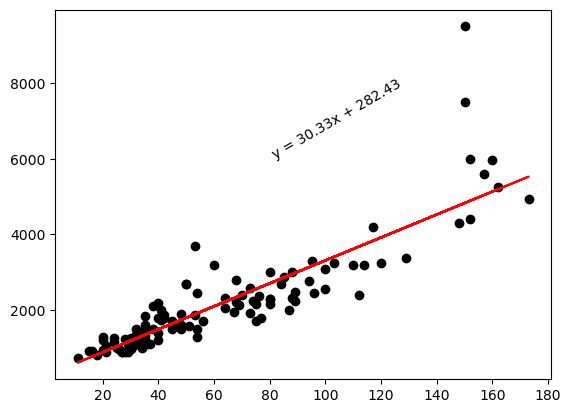

In [512]:
plt.scatter(x,y,color="black")
plt.plot(x_t,y_p,color='red')
plt.text(80,6000,f"y = {a}x + {b}",rotation = 30)
plt.show()

In [514]:
diff_carree = (y_test-y_pred)**2
scr = sum(diff_carree)
scr

52300444.16287608

In [516]:
sct = sum((y_test-np.mean(y_test))**2)
sct

216949746.6296296

In [518]:
r2 = np.round((1-scr/sct),2)
r2

0.76

In [520]:
np.round(r2_score(y_test_reshape,y_pred),2)

0.76

In [522]:
mse = mean_squared_error(y_test_reshape,y_pred)
np.round(mse,2)

484263.37

In [524]:
rmse = np.sqrt(mse)
np.round(rmse,2)

695.89

In [526]:
mae = mean_absolute_error(y_test_reshape,y_pred)
np.round(mae,2)

412.58

In [528]:
X_test.tail()

318    40
17     35
533    20
435    77
457    37
Name: surface, dtype: int64

In [530]:
y_pred[50]

1344.0336406626411

In [532]:
erreurs = y_test - y_pred

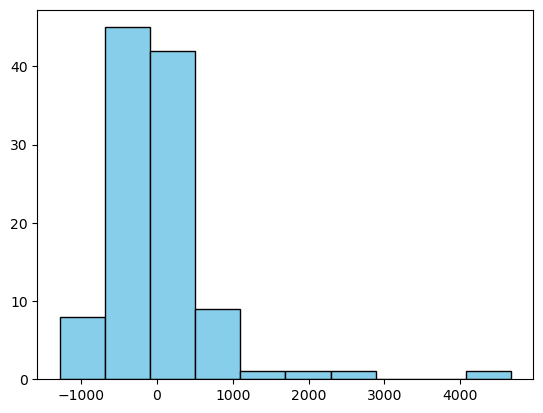

In [534]:
plt.hist(erreurs,color='skyblue',edgecolor='black')
plt.show()